In [28]:
import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb


from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.utils import plot_model

import shap

importlib.reload(plt)

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.


<module 'matplotlib.pyplot' from '/miniconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    NOTE: Taken from sklearn example
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (8, 8))
    
    #ax.figsize((10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    ax.plot()
    fig.tight_layout()
    fig.show()
    #return ax

In [3]:
model = tensorflow.keras.models.load_model('../data/models/CNN_GPU_VGG_Multi_Channel_wide.model')

In [4]:
drugbank = pd.read_csv('../data/intermediate/interactions_preprocessed_OG.csv', iterator = False, converters={"target_gene_encoded_padded": \
                                                                                     lambda x: np.array(x.strip("[]").replace("'","").split(", ")),
                                                                                    "drug_fingerprint_encoded_padded": \
                                                                                    lambda x: np.array(x.strip("[]").replace("'","").split(", "))})



In [5]:
#drugbank = pd.read_csv('../data/intermediate/interactions_preprocessed.csv', chunksize = 500, iterator = True, converters={"target_gene_encoded_padded": \
#                                                                                     lambda x: np.array(x.strip("[]").replace("'","").split(", ")),
#                                                                                    "drug_fingerprint_encoded_padded": \
#  

## Validation on Test Set (First 5 chunks of 500 pairs left out in training)

In [5]:
drugbank = drugbank.sort_values(['drug_id', 'Y'], ascending = False)

drugbank_test_sets = np.array_split(drugbank, len(drugbank)/500)[:5]

In [6]:
trim_width = 0

Y_test_actual = []
Y_test_predictions = []

for drugbank_test in drugbank_test_sets:  
    
    print('Padding..') 
    X_0 = np.array(list(drugbank_test['target_gene_encoded_padded']))
    X_1 = np.array(list(drugbank_test['drug_fingerprint_encoded_padded']))
    Y   = np.array(list(drugbank_test['Y']))


    X_0_test = np.array(list(drugbank_test['target_gene_encoded_padded']))
    X_1_test = np.array(list(drugbank_test['drug_fingerprint_encoded_padded']))

    Y_test_actual.extend(np.array(list(drugbank_test['Y'])))

    print(X_0.shape)
    print(X_1.shape)

    print(X_0_test.shape)
    print(X_1_test.shape)

    print('Trimming..')
    X_0 = X_0[:, int(trim_width/2) : X_0.shape[1] - int(trim_width/2)]
    X_1 = X_1[:, int(trim_width/2) : X_1.shape[1] - int(trim_width/2)]

    X_0_test = X_0_test[:, int(trim_width/2) : X_0_test.shape[1] - int(trim_width/2)]
    X_1_test = X_1_test[:, int(trim_width/2) : X_1_test.shape[1] - int(trim_width/2)]


    X_0 = X_0.astype(int) + 1
    X_1 = X_1.astype(int) + 1
    #Y   = Y.astype(int)

    X_0_test = X_0_test.astype(int) + 1
    X_1_test = X_1_test.astype(int) + 1
    #Y_test   = Y_test.astype(int)

    print(X_0.shape)
    print(X_1.shape)

    print(X_0_test.shape)
    print(X_1_test.shape)

    #X_0 = np.hstack((X_0, X_1))
    #X_0_test = np.hstack((X_0_test, X_1_test))

    Y_test_predictions.extend(model.predict([X_1_test[..., np.newaxis],X_0_test[..., np.newaxis]]))
    




Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)


In [7]:
#Y_test_predictions = np.array(Y_test_predictions).ravel()

roc_auc_score:  0.9852266044068587


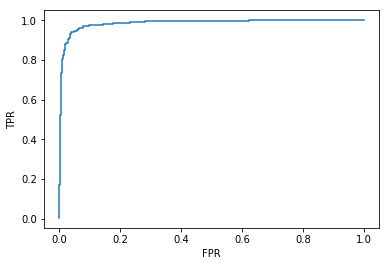

-----


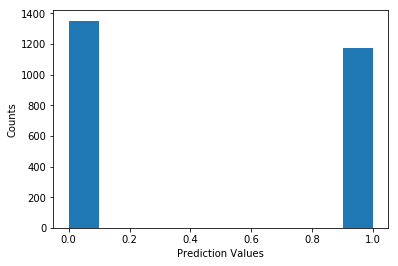

Confusion_matrix[[1301   88]
 [  51 1085]]
f1-score: 0.9398007795582504
             precision    recall  f1-score   support

          0       0.96      0.94      0.95      1389
          1       0.92      0.96      0.94      1136

avg / total       0.95      0.94      0.95      2525



In [8]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_actual , Y_test_predictions)

print('roc_auc_score: ', roc_auc_score(Y_test_actual, Y_test_predictions))

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('-----')


Y_test_predictions_bin = [1 if (i > 0.85) else 0 for i in Y_test_predictions ]


plt.hist(Y_test_predictions_bin)
plt.xlabel('Prediction Values')
plt.ylabel('Counts')
plt.show()

cm = confusion_matrix(Y_test_actual, Y_test_predictions_bin)

print('Confusion_matrix' + str(cm))

print('f1-score: ' + str(f1_score(Y_test_actual, Y_test_predictions_bin)))


print(classification_report(Y_test_actual, Y_test_predictions_bin))




In [9]:
len(Y_test_actual)

2525

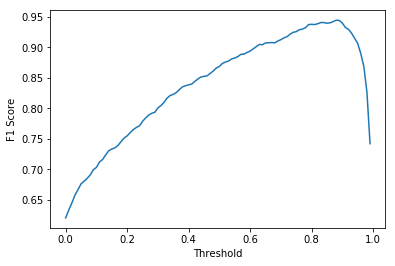

In [10]:
f1_scores = []
plot_x = []

for j in np.arange(0.0, 1.0, 0.01):
    f1_scores.append(f1_score(Y_test_actual, [1 if (i > j) else 0 for i in Y_test_predictions]))
    plot_x.append(j)

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.plot(plot_x, f1_scores)

In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 21222, 1)     0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           (None, 9501, 1)      0                                            
__________________________________________________________________________________________________
conv1d_90 (Conv1D)              (None, 10608, 612)   5508        input_19[0][0]                   
__________________________________________________________________________________________________
conv1d_91 (Conv1D)              (None, 4747, 356)    3204        input_20[0][0]                   
__________________________________________________________________________________________________
dropout_27

Normalized confusion matrix
[[0.93664507 0.06335493]
 [0.04489437 0.95510563]]


/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


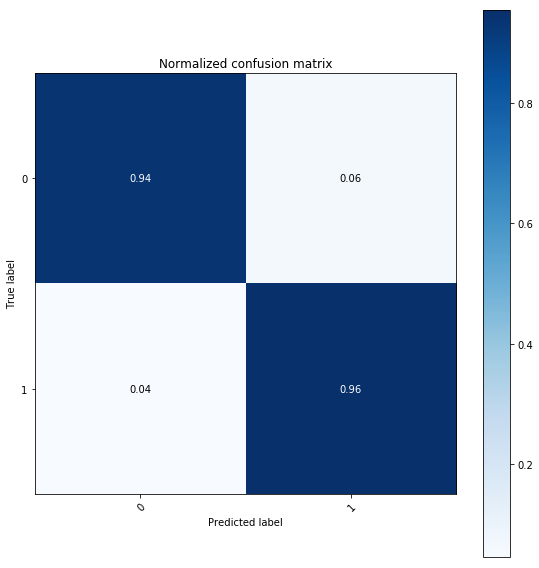

In [12]:

plot_confusion_matrix(Y_test_actual, Y_test_predictions_bin, normalize = True, classes = [0,1])

In [13]:
f1_score(Y_test_actual, Y_test_predictions_bin)

0.9398007795582504

## Scores for Entire DrugBank

In [14]:
drugbank_all = np.array_split(drugbank, len(drugbank)/500)

In [15]:
trim_width = 0

Y_test_actual = []
Y_test_predictions = []

for drugbank_test in tqdm(drugbank_all):  
    
    print('Padding..') 
    X_0 = np.array(list(drugbank_test['target_gene_encoded_padded']))
    X_1 = np.array(list(drugbank_test['drug_fingerprint_encoded_padded']))
    Y   = np.array(list(drugbank_test['Y']))


    X_0_test = np.array(list(drugbank_test['target_gene_encoded_padded']))
    X_1_test = np.array(list(drugbank_test['drug_fingerprint_encoded_padded']))

    Y_test_actual.extend(np.array(list(drugbank_test['Y'])))

    print(X_0.shape)
    print(X_1.shape)

    print(X_0_test.shape)
    print(X_1_test.shape)

    print('Trimming..')
    X_0 = X_0[:, int(trim_width/2) : X_0.shape[1] - int(trim_width/2)]
    X_1 = X_1[:, int(trim_width/2) : X_1.shape[1] - int(trim_width/2)]

    X_0_test = X_0_test[:, int(trim_width/2) : X_0_test.shape[1] - int(trim_width/2)]
    X_1_test = X_1_test[:, int(trim_width/2) : X_1_test.shape[1] - int(trim_width/2)]


    X_0 = X_0.astype(int) + 1
    X_1 = X_1.astype(int) + 1
    #Y   = Y.astype(int)

    X_0_test = X_0_test.astype(int) + 1
    X_1_test = X_1_test.astype(int) + 1
    #Y_test   = Y_test.astype(int)

    print(X_0.shape)
    print(X_1.shape)

    print(X_0_test.shape)
    print(X_1_test.shape)

    #X_0 = np.hstack((X_0, X_1))
    #X_0_test = np.hstack((X_0_test, X_1_test))

    Y_test_predictions.extend(model.predict([X_1_test[..., np.newaxis],X_0_test[..., np.newaxis]]))


Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Trimming..
(505, 21222)
(505, 9501)
(505, 21222)
(505, 9501)
Padding..
(505, 21222)
(505, 950

Padding..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Trimming..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Padding..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Trimming..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Padding..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Trimming..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Padding..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Trimming..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Padding..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Trimming..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Padding..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Trimming..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Padding..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Trimming..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Padding..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Trimming..
(504, 21222)
(504, 9501)
(504, 21222)
(504, 9501)
Padding..
(504, 21222)
(504, 950

In [16]:
#Y_test_actual = Y_test_actual[:11569]


In [17]:
len(Y_test_actual)

46918

In [18]:
len(Y_test_predictions)

46918

roc_auc_score:  0.9841871497225713


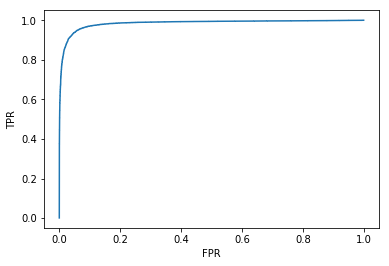

-----


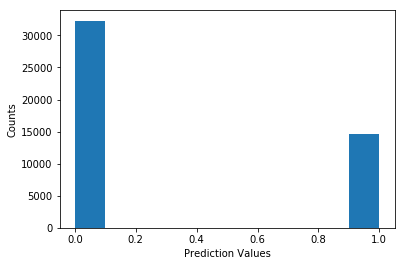

Confusion_matrix[[31348  1496]
 [  945 13129]]
f1-score: 0.914944771594829
             precision    recall  f1-score   support

          0       0.97      0.95      0.96     32844
          1       0.90      0.93      0.91     14074

avg / total       0.95      0.95      0.95     46918



In [25]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test_actual , Y_test_predictions)

print('roc_auc_score: ', roc_auc_score(Y_test_actual, Y_test_predictions))

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('-----')


Y_test_predictions_bin = [1 if (i > 0.85) else 0 for i in Y_test_predictions ]


plt.hist(Y_test_predictions_bin)
plt.xlabel('Prediction Values')
plt.ylabel('Counts')
plt.show()

cm = confusion_matrix(Y_test_actual, Y_test_predictions_bin)

print('Confusion_matrix' + str(cm))

print('f1-score: ' + str(f1_score(Y_test_actual, Y_test_predictions_bin)))


print(classification_report(Y_test_actual, Y_test_predictions_bin))





In [26]:
f1_score(Y_test_actual, Y_test_predictions_bin)

0.914944771594829

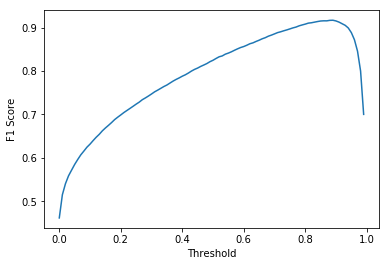

In [24]:
f1_scores = []
plot_x = []

for j in np.arange(0.0, 1.0, 0.01):
    f1_scores.append(f1_score(Y_test_actual, [1 if (i > j) else 0 for i in Y_test_predictions]))
    plot_x.append(j)

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.plot(plot_x, f1_scores)